# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import io

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    
    #remove all whitespace before ',' in csv file otherwise pandas acts weird when doing  data selecting
    buffer  = open("customers.csv", 'r').read()
    buffer = buffer.replace(" ", "")

    data = pd.read_csv(io.StringIO(buffer))
    #data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    display(data.head(n=10))
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
from random import *
base = list(range(0, data['Fresh'].count()))

#indices = sample(base, 3)
indices = [392, 251, 371]
print(indices)
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

[392, 251, 371]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,518,4180,3600,659,122,654
1,6134,23133,33586,6746,18594,5121
2,20105,1887,1939,8164,716,790


### Remark
I had to run a few times before getting the above list

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
The 3 samples I run seem to suggest that:
    1. sample 1 : seem to be a consumer who doesn't shop or buy very little things.
    2. sample 2: seem to be a consumer who has high volume purchase Grocery Milk and Detergents_Paper . 
    3. sample 3: seem to be a customer who has high volume purchase of Fresh.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

features_data = data.copy()
feature_names = list(data.keys())

for index in range(len(feature_names)):
    feature_removed = feature_names[index]
    features_used = feature_names[0:index] + feature_names[index+1 : len(feature_names)]
    print("trainig to predit ", feature_removed, " using ", features_used)
    #print( features_data[feature_removed].values)
    #print(features_data[features_used].values)
    X_train, X_test, y_train, y_test = train_test_split(features_data[features_used].values,
                                                        features_data[feature_removed].values,
                                                        test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 42 , max_depth = 5 )
    regressor = regressor.fit(X_train, y_train)
    score  = regressor.score(X_test,y_test)
    print("score: {:.4}".format(score))

feature_names = list(data.keys())[:(len(feature_names))-1]    
for index in range(len(feature_names)):
    feature_removed = feature_names[index]
    features_used = feature_names[0:index] + feature_names[index+1 : len(feature_names)]
    print("trainig to predit ", feature_removed, " using ", features_used)
    #print( features_data[feature_removed].values)
    #print(features_data[features_used].values)
    X_train, X_test, y_train, y_test = train_test_split(features_data[features_used].values,
                                                        features_data[feature_removed].values,
                                                        test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 42, max_depth = 5  )
    regressor = regressor.fit(X_train, y_train)
    score  = regressor.score(X_test,y_test)
    print("score: {:.4}".format(score))



trainig to predit  Fresh  using  ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
score: -0.2329
trainig to predit  Milk  using  ['Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
score: 0.411
trainig to predit  Grocery  using  ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen']
score: 0.7495
trainig to predit  Frozen  using  ['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicatessen']
score: 0.04656
trainig to predit  Detergents_Paper  using  ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicatessen']
score: 0.4767
trainig to predit  Delicatessen  using  ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper']
score: -10.3
trainig to predit  Fresh  using  ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper']
score: -0.3344
trainig to predit  Milk  using  ['Fresh', 'Grocery', 'Frozen', 'Detergents_Paper']
score: 0.4514
trainig to predit  Grocery  using  ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper']
score: 0.7548
trainig to predit  Frozen  usi

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1. I actually did a sweep of predicting one feature using N-1 other features  in the data . Below is the data:

    1. trainig to predit  Fresh  using  ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'] score: -0.2329
    2. trainig to predit  Milk  using  ['Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'] score: 0.411
    3. trainig to predit  Grocery  using  ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'] score: 0.7495
    4. trainig to predit  Frozen  using  ['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicatessen'] score: 0.04656
    5. trainig to predit  Detergents_Paper  using  ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicatessen'] score: 0.4767
    6. trainig to predit  Delicatessen  using  ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'] score: -10.3

2. 
    1. From the data, it looks like the hightest predicting score is to use  ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'] to predict 'Grocery'. The lowest score is to use ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'] to predict 'Delicatessen'. Since the score function in DecisionTreeRegressor is R2 score, a negative score would mean "no better than random guess". This leads me to think that  Delicatessen might not be an important feature to consider when considering relevance.
    2. I used ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper'] to predict 'Grocery' and that gets a slightly higher score of 0.7548. So that  might show 'Delicatessen' is not an important feature(noisy feature to the preditor) to predict 'Grocery'. 
   
3. I think since Grocery might be collectively predicted by ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper']. Maybe that is a redundant feature. But I don't think one feature alone from ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper']  could explain the customer spending habits.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

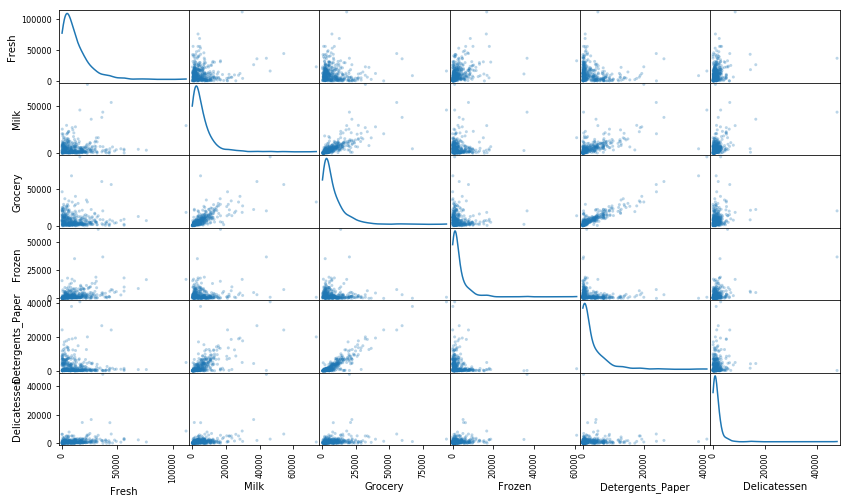

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.pandas.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000



Grocery: mean, median, max, min 
7951.28
4755.50
92780.00
3.00


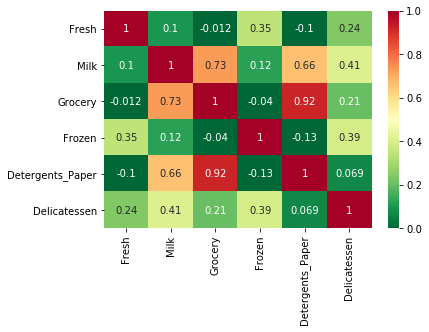

In [41]:
import seaborn as sns
corelation = data.corr()
display(pd.DataFrame(data=corelation))
sns.heatmap(corelation, cmap='RdYlGn_r', annot=True,vmin=0, vmax=1)

print("\nGrocery: mean, median, max, min ")
print("{:.2f}".format(data['Grocery'].mean()))
print("{:.2f}".format(data['Grocery'].median()))
print("{:.2f}".format(data['Grocery'].max()))
print("{:.2f}".format(data['Grocery'].min()))


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
1. Each category's data is not typical gussian distribution. It is heavily concentrated in small values but there are big purchases on the far end of the distribution. We can see it from the scatter_matrix plot. For example, Grocery's median is way smaller than mean and  there are  less distributed big purchase pulling the mean toward higher value
2. From the heatmap, I can see that (pairwise) ['Milk','Grocery'],['Detergents_Paper','Grocery'],['Milk','Detergents_Paper'] have high correlation ( Cov > 0.5)
3. The data confirms my suspcision before that ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'] are correlated. The correlation matrix further shows that ['Milk', 'Grocery', 'Detergents_Paper'] are even more correlated. The 3 features again are heavily skewed. 
4. I think we need to do some feature scaling and transformation because all 6 features are heavily skewed toward lower end.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

lambda used for Fresh : 0.30
lambda used for Milk : 0.07
lambda used for Grocery : 0.13
lambda used for Frozen : 0.09
lambda used for Detergents_Paper : 0.06
lambda used for Delicatessen : 0.19


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,518,4180,3600,659,122,654
1,6134,23133,33586,6746,18594,5121
2,20105,1887,1939,8164,716,790


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18.057824,11.165513,14.473421,8.800720,5.588007,12.824461
1,41.108472,14.333077,21.848717,13.423085,13.498371,21.520190
2,59.791520,9.812139,12.776230,13.846661,8.099098,13.488007


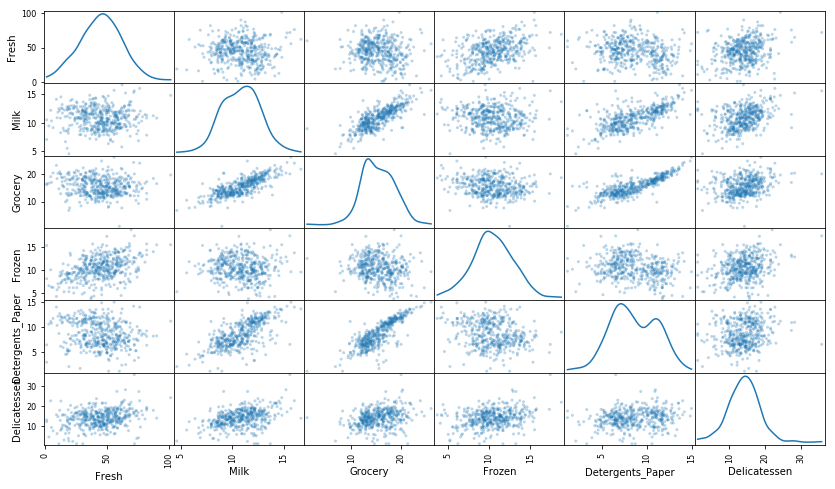

In [93]:
# TODO: Scale the data using the natural logarithm
from scipy import stats

# TODO: Scale the sample data using the natural logarithm
feature_names = list(data.keys())
log_data = data.copy()
lamdas = np.zeros(len(feature_names))
## stats.boxcox needs to be 1-dimensional input
for index in range(len(feature_names)):
    log_data[feature_names[index]],maxlog = stats.boxcox(log_data[feature_names[index]])
    print("lambda used for {:s}".format(feature_names[index]), ": {:.2f}".format(maxlog) )
    lamdas[index] = maxlog
    
log_samples = samples.copy()
display(samples)

for index in range(len(samples)):
    log_samples.iloc[index] = (samples.iloc[index]**lamdas - 1) / lamdas

display(log_samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting. scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,51.736919,12.670296,16.694343,6.887991,10.154313,15.470232
1,42.989031,12.699553,17.444170,10.638490,10.494584,16.620941
2,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731
5,47.107027,12.382990,15.504788,8.819617,9.515001,15.793348
6,51.028391,10.702300,16.442556,8.242119,10.416452,12.206414
7,43.976737,11.464770,17.395871,10.532895,10.508512,18.212276
8,40.738501,10.928721,16.075628,8.031803,9.443784,13.303120
9,40.832231,12.927883,19.740403,9.835917,11.865710,17.327648


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.023114,-0.106490,0.409108,-0.180152,0.274444
Milk,-0.023114,1.000000,0.777832,-0.044705,0.684856,0.384415
Grocery,-0.106490,0.777832,1.000000,-0.161393,0.818136,0.283831
Frozen,0.409108,-0.044705,-0.161393,1.000000,-0.219160,0.277641
Detergents_Paper,-0.180152,0.684856,0.818136,-0.219160,1.000000,0.178416
Delicatessen,0.274444,0.384415,0.283831,0.277641,0.178416,1.000000


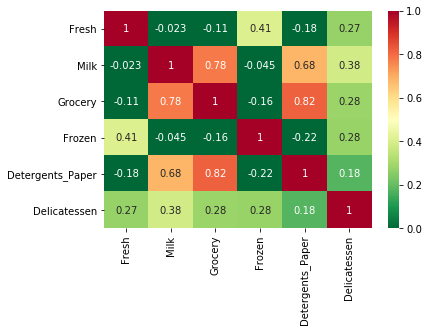

In [42]:
# Display the log-transformed sample data
display(log_data.head(n=10))

corelation = log_data.corr()
display(pd.DataFrame(data=corelation))
sns.heatmap(corelation, cmap='RdYlGn_r', annot=True,vmin=0, vmax=1)


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [80]:
# For each feature find the data points with extreme high or low values
outliers  = []
record_count = len(data.index)
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1) 
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_index = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values.astype(int)
    print("Outlier percentage: {:.6f}".format(len(outlier_index)/record_count),"in {:s}".format(feature))
    outliers.extend(outlier_index)
    
# OPTIONAL: Select the indices for data points you wish to remove
print("\n\nOutlier indices: " , outliers)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Before removing outliers the statistical characters of the data:")
display(log_data.describe())
print("After removing outliers the statistical characters of the data:")
display(good_data.describe())

outliers_none_duplicated = list(set(outliers))
print("Total outlier removed : ", len(outliers_none_duplicated), "Percentage: ",  len(outliers_none_duplicated)/len(data.index))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,101.573143,14.821915,19.601092,15.50805,11.172697,24.271947


Outlier percentage: 0.002273 in Fresh
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,62.288609,16.688053,21.679026,9.536029,13.638422,13.972230
154,19.248391,4.596233,6.853242,5.270266,2.066981,2.552898


Outlier percentage: 0.004545 in Milk
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,60.062043,8.986896,1.179625,12.503507,1.136529,14.255725
85,55.798197,15.720152,25.969331,9.607979,14.972315,18.835821


Outlier percentage: 0.004545 in Grocery
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,37.459452,13.586912,19.312696,4.105383,11.753132,11.456670
57,39.504696,12.722615,17.742449,4.299517,11.899624,15.301847
65,9.188742,14.140339,23.052620,4.224827,13.986676,15.715235
93,49.925899,10.642868,12.938974,17.328537,4.872810,18.437994
145,61.528592,12.410476,21.982978,4.438733,12.793740,20.789660
183,72.168663,15.617995,19.974332,17.437506,6.510175,35.778584
325,69.562134,13.711142,18.613584,18.774934,8.975021,21.989377
420,37.101010,11.572219,18.513233,3.730425,11.718648,15.630149


Outlier percentage: 0.018182 in Frozen
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Outlier percentage: 0.000000 in Detergents_Paper
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,65.063127,15.236169,20.288091,12.837631,10.951341,28.228416
71,58.051662,9.159633,20.125297,12.927220,10.886939,27.391986
87,75.837758,11.489218,16.917970,13.277140,9.312650,27.339709
109,25.412563,13.704848,21.294647,8.838334,8.332239,1.222366
128,11.185311,12.509059,14.645549,6.237033,8.696657,1.222366
142,72.282907,12.121060,16.970632,11.699033,3.289073,1.222366
154,19.248391,4.596233,6.853242,5.270266,2.066981,2.552898
183,72.168663,15.617995,19.974332,17.437506,6.510175,35.778584
184,15.333829,8.646688,15.253508,5.250524,6.983535,3.041318
187,30.495863,12.325237,17.528035,13.262187,10.575590,1.222366


Outlier percentage: 0.025000 in Delicatessen


Outlier indices:  [181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420, 23, 71, 87, 109, 128, 142, 154, 183, 184, 187, 233]
Before removing outliers the statistical characters of the data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,44.845742,10.856013,15.434100,10.443894,8.555818,14.007201
std,16.718993,1.854735,3.210892,2.443837,2.592704,4.362090
min,1.297776,4.596233,1.179625,3.730425,1.136529,1.222366
25%,33.082657,9.470306,13.054013,9.014500,6.610681,11.270068
50%,45.615090,10.918724,15.281914,10.359550,8.296571,14.219307
75%,56.668564,12.130722,17.794723,12.052170,10.783593,16.723910
max,101.573143,16.688053,25.969331,18.774934,14.972315,35.778584


After removing outliers the statistical characters of the data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,44.690619,10.776941,15.326141,10.465977,8.523350,13.973523
std,16.219963,1.761306,3.025984,2.255994,2.513766,3.795359
min,1.297776,5.548677,7.751767,4.596686,1.136529,3.857628
25%,33.212093,9.451803,13.028459,9.093253,6.607940,11.293176
50%,45.460294,10.896884,15.185753,10.374677,8.243007,14.200028
75%,56.104141,12.058340,17.561912,11.998316,10.749164,16.627985
max,90.265183,16.052045,24.608816,15.774454,14.839991,23.790243


Total outlier removed :  22 Percentage:  0.05


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
1. Yes. For example data row index [154,183] both have more than one feature in outlier 
2. point [154] has Milk and Delicatessen both on the lowest end of the distributions. point [183] has Frozen and Delicatessen both on the highest end of the distributions. I think the 2 data points are not really representive at all.
3. I think outliers should be removed to perform clustering(for this case) because of 3 reasons. 
    1. the percentage is very low. 5%
    2. The data that are in the outliers list are actually the ones in the far ends of the distribution. Either the original max(or points very close to max) or the original min( or points very close to min). 
    3. Removing them doesn't change the overal statistical characteristics of the data(see the 2 stats data table print out) and it helps the clustering for the reason that clustering algorithms perform the best when points are not spreading too much.
    4. The goal of this homework is to cluster custmer spending habits not anomaly detection. Removing the points in the far ends of the spectrum wouldn't change much of the cluster centroids locations
    

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.87967011  0.06505694  0.0349078   0.01294538  0.00436101  0.00305876]


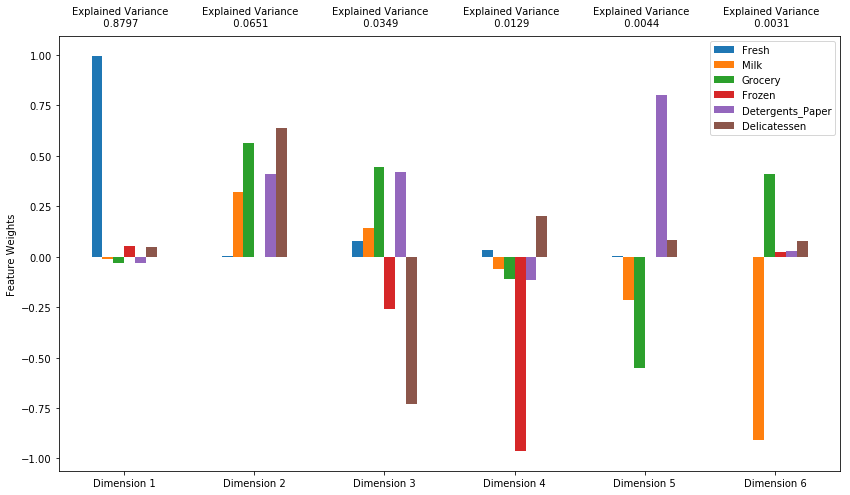

In [81]:
from  sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys()),svd_solver ='randomized',random_state = 42).fit(good_data)
print(pca.explained_variance_ratio_)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
1. The 1st and 2nd components represent 0.9447 variance
2. The 1st 4 components represent 0.9926 of the variance.
3. Below is my analysis:
    1. The 1st component well represents Fresh spending. The dimension decomposition makes perfect sense to me in that in both original data and scaled data, spending on Fresh has the highest numerical values. It should be the dominating component.
    2. The 2nd component represents a combined spending of Milk, Grocery,Detergents_Paper and Delicatessen. In the previous data exploration session, I also noticed that Milk, Grocery,Detergent_paper somehow have correlation. Grouping them together will well preserve this trend. This represents the customers that are buying Milk,Grocery,Detergent_paper,Delicatessen more often all together. 
    3. Dimension 3 represents a combined spending of 6 categories with Frozen and Delicatessen weighted negative and Grocery and Detergent_paper weighted positive and high. Customers of this type seem to have large volume purchase of Grocery and Detergent_paper and little on Frozen and Fresh
    4. Dimension 4 represents a combined spending of 6 categories with only Delicatessen being postive. I think they are the cusomters who like to go to the cafe corner!


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [82]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-26.5602,-2.3751,-2.3326,0.8789,-2.1845,-0.9076
1,-3.4453,11.6849,-1.0995,-2.9584,0.2262,0.2239
2,15.3020,-2.1915,-0.8036,-2.4503,1.3001,-0.1452


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [83]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,svd_solver ='randomized',random_state = 42)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [84]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-26.5602,-2.3751
1,-3.4453,11.6849
2,15.3020,-2.1915


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

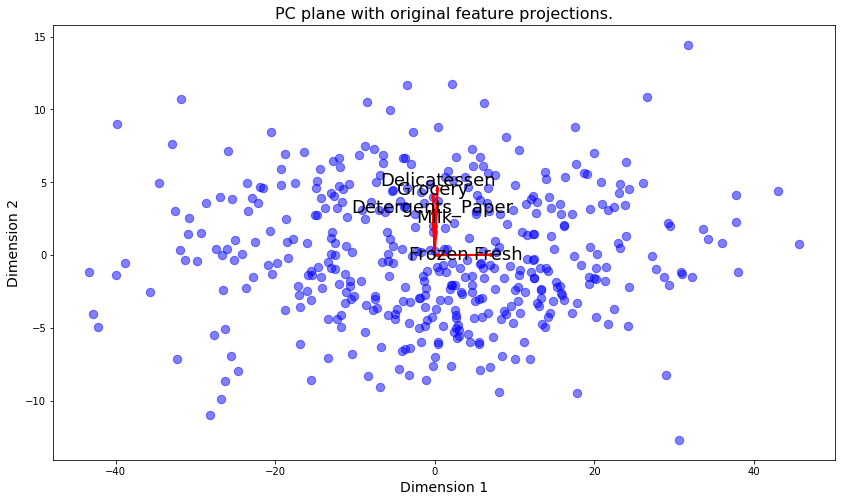

In [85]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**
The Fresh is most strongly correlated with the first component. And everything else seems to be correlated with 2nd component. Yes the observation agrees the pca_results plot 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
1. K-means advantage: With a large number of variables, K-Means may be computationally faster than EM and its implementation is easier. K has better performance when distance metric is based on L2 norm ( I also think K-means is biased toward spherical clusters and K-means works the best when all features have similar distance range. If one dimension is heavily skewed or elongated, K mean might not do the ideal clustering if without proper pre-processing)
2. Gaussian Mixture Model clustering algorithm advantage: likelihood is guaranteed to increase for each iteration, however convergence toward the maximum may be slow. It doesn't depend on the L2 norm, but is based on the Expectation, i.e., the probability of the point belonging to a particular cluster.
3. I would choose Gaussian Mixture Model for the reason that
    1. metric of distance is not represented well by L2 norm and Fresh spending is a lot larger than any others feature so if I use K-means clustering, it might not cluster in the ideal way.
    2. The 2nd reason is that the assignment of one point to a cluster is based on probability so it allows data points "overlapping" with clusters versus K-means does not. In this task we are seeing that there are customers have big purchase in Fresh and also big purchase in ['Milk','Grocery','Detergents_Paper','Delicatessen'] so the Gaussian mixture model would apply better. 
    3. The final reason is that from the scaled data plotting, I see that all features are distributed close to gaussian distribution. It make more sense to use Gaussian mixture model


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [86]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from  sklearn.metrics import silhouette_score,silhouette_samples
scores = np.zeros(6)
for n in range(2,8,1): # needs to start at least from 2
    clusterer = mixture.GaussianMixture(n_components=n, covariance_type='full',random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #print(preds.shape, reduced_data.shape)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    print("\ncenters", centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[n-2] = score
    #sample_silhouette_values = silhouette_samples(reduced_data, preds)
    print("silhouette_score of {:d} clusters".format(n),":{:.4f}".format(score))



centers [[  9.36577933  -0.89552125]
 [-11.29970577   1.08043616]]
silhouette_score of 2 clusters :0.4376

centers [[ 16.30549476   0.09917835]
 [  0.59603326  -0.62236632]
 [-17.56318185   0.74474637]]
silhouette_score of 3 clusters :0.4347

centers [[  6.49395009  -2.11666469]
 [ -7.57228725   1.76212334]
 [-25.26465884   0.43016276]
 [ 20.89324848   1.04808934]]
silhouette_score of 4 clusters :0.3319

centers [[  2.32725074  -0.93401966]
 [-10.2281124    1.10434482]
 [-26.49858298   0.33562683]
 [ 28.19268661   0.55068787]
 [ 14.40981524  -0.43496496]]
silhouette_score of 5 clusters :0.3811

centers [[  8.54528921  -0.34439488]
 [-13.08782877   0.3205367 ]
 [-27.36226742   0.10210178]
 [ 31.86378542   0.33722511]
 [ 18.53067181   0.78283607]
 [ -1.51359985  -0.42372149]]
silhouette_score of 6 clusters :0.3455

centers [[  8.83990039  -0.33102758]
 [-11.31503649   0.90499479]
 [-34.14399112   1.81784612]
 [ 31.78003537   0.35593748]
 [ 18.46731167   0.81206477]
 [ -0.44331439  -1.35

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
1. numbers are below:
    1. silhouette_score of 2 clusters :0.4376
    2. silhouette_score of 3 clusters :0.4347
    3. silhouette_score of 4 clusters :0.3319
    4. silhouette_score of 5 clusters :0.3811
    5. silhouette_score of 6 clusters :0.3455
    6. silhouette_score of 7 clusters :0.3268
2. number of cluster 2 reports the best score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

best cluster number:  2


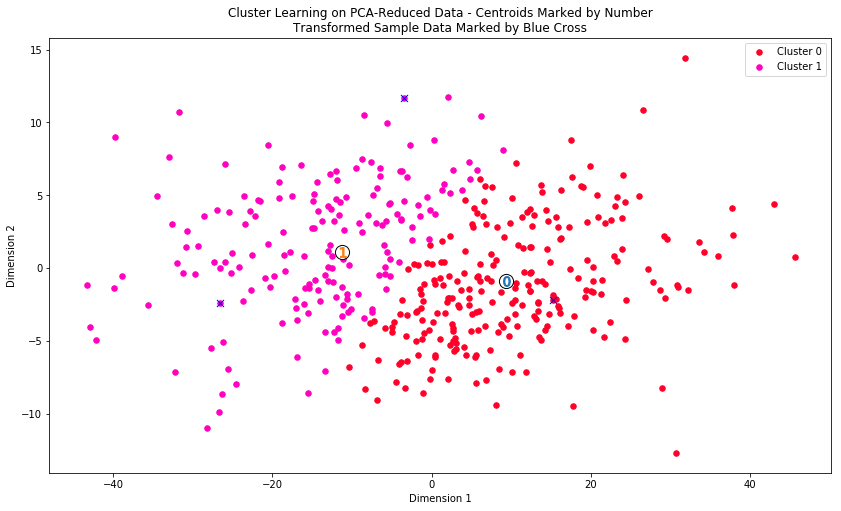

In [92]:
# Display the results of the clustering from implementation
best_n = scores.argmax() + 2
print("best cluster number: ", best_n)
clusterer = mixture.GaussianMixture(n_components=best_n, covariance_type='full',random_state=42).fit(reduced_data)
centers = clusterer.means_
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)

import visuals as vs
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [88]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
#print(log_centers)
true_centers = np.zeros(log_centers.shape)
# TODO: Exponentiate the centers
# 
# The Box-Cox transform is given by:
# y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#     log(x),                  for lmbda = 0 luckily no case here
# so inverse transform is 
# y =  exp(log(x * lmbda +1)/lmbda)  for  lmbda > 0
#      exp(x),                       for lmbda = 0 luckily no case here
#print(lamdas)
for i in range(len(log_centers)):   
        true_centers[i] = np.exp(np.log(log_centers[i] * lamdas+1)/lamdas) 

print(true_centers)
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

[[ 14535.28042467   2685.75773873   3687.59142721   2079.81316223
     602.70331402    872.43351173]
 [  3231.18043258   4329.5472191    6601.06264577   1176.6648679
    1611.58143694    941.75140819]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,14535.0,2686.0,3688.0,2080.0,603.0,872.0
Segment 1,3231.0,4330.0,6601.0,1177.0,1612.0,942.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Comparing the segement centers and origital means of each spending category, we can see that Segment 0 center of Feash 14535.28.0 is  significant higher than the overall mean 12000.29 and everything else in segment 0 is below original mean(i.e Milk center 2686.0 vs overal mean 5796.26).  The segment 1's all categories are below overall means but close to 50% percentile except for Fresh around 25% percentile.  I think Segment 0 could represent high volume purchase from restaurants or hotels or food chains.  Segment 1 could represent lower volume purchase customers.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [89]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)
    

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
1. I think Segment 0 could represent high volume purchase from restaurants/hotels/food chains. Segment 1 could represent lower volume purchase customers who I think possibly are regular customers shopping for families.
2. The prediction looks consistent on 2 samples except for sample 0. Both of its values 2 dimensions are low. So it is hard to say if the prediction is really capturing the true segment


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
1. First we can't assume the change affects all customer equally. We need to carefully design A/B tests. The goal of the test is to see if the statistical distribution of changed delivery service in feature group is different from the control group. We could use X as random variable to represent response rate, XA denotes response rate from group A(control group) and XB denotes response rate  from group B(feature group that has delivery servce change) and measure expected effectiveness as E(B) = XB - XA. If we are seeing positive E(B) that shows the delivery service change introduced in group B has positive react.
2. Below describes how to carry out the test to find out what group of customers the change of service affects the most
     1. Calculate the percentage of customers classified as from segment 0(restaurants/hotels/food chains). denote as p. The segment 1(regular customer) customer percentage is 1-p.
     2. Let N denote total sampled customers(for example 100). Sample N*p customers from segment 0 and N*(1-p) customers from segment1
     3. Send survey message to all N customers as "If we change our delivery service from currently 5 days a week to 3 days a week, would you shop more often here?" with options "Yes" or "No". and collect the survey.
     4. Calculate the  reaction rate for each group. That is:
          1. positve reaction rate segment 0 = number of people who checked "Yes" / N*p. denoted by X0_p
          2. negative reaction rate segment 0 = number of people who checked "No" / N*p. denoted by X0_n
          3. positve reaction rate for segment 1 = number of people who checked "Yes" / N*(1-p). denoted by X1_p
          4. negative reaction rate for segment 1 = number of people who checked "No" / N*(1-p). denoted by X1_n
          5. Effective rate for segment 0 = X0_p - X0_n . denoted by E(X0)
          6. Effective rate for segment 1 = X1_p - X1_n.  denoted by E(X1)
     5. Check E(X0) - E(X1)
         1. if E(X0) >> E(X1) this shows that customers from segment 0 (hotel/resturant/chains) has much higher positive reaction toward delivery service. The  wholesale distributor  should consider targeting the service change to those customers only
         2. If E(X1) >> E(X0), the wholesale distributor should consider targeting the service change to retail customers.
         3. if Both E(X0) >0  && E(X1) > 0 and they are in the same numercial range, that shows two segments both react positively,  the wholesale distributor  could apply  service change to both customer segments.
      


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
We can fram the problem as : given the labels for the segement of the already aquired customer database, predict the segement of the newly acquired customer data.

We have got 6 features and labels for segment 0(hotel/restaurant/chains)/1(retail). We could use a supervise learning classifier to fit the data and predict the new customer. The conventional splitting of training and testing data on the existing customer database still applies. And after successful training we can use that classifer to predict the new customer's . 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

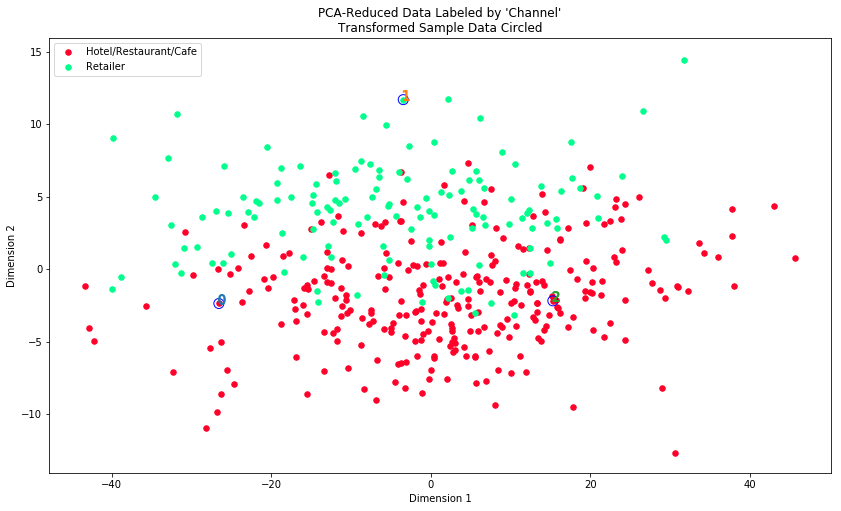

In [90]:
# Display the clustering results based on 'Channel' data
import visuals as vs
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
1. I got right on the number of cluster. The clustering algorithm performance ok on this data.Out of 3 samples, sample 0 is from 'Hotels/Restaurants/Cafe but my prediction clusters it to 'Retail'
2. There are customers that are seen as pure "Retailers" which cover the left top are and  "Hotels/Restaurants/Cafes" which are in the  bottom . For the points in the middle I wouldn't say there are pure "Retailers" or "Hotels/Restaurants/Cafes" . If there were, we should see two  distinct clusterings here. But the drawing here suggests that there is fairly large area of segment"overlapping".
3. I would still say these classifications  for the pure "Hotels/Restaurants/Cafes" and "Retailers" are consistent with customer segments definition. The 'HoReCa' customers generally are in the lower part of the picture and either have large values on dimension 1 or  lowe values  dimension 2 and 'Retailer' customers  have larger value on dimension 2 and lower value on dimesion 1. That is in-line with statistical characteristics of the 2 clustering.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.